# Switching on camera policy


In the model part, the expressivenesses of the agents are set as normal distribution instead of random sampling. Switching on camera is explained as improving the "mu" in students expressivenesses due to the more chances of facial expression.

· I was not sure whether we should also use the random distribution and shift them upwards in a general way, or in a proportional way. 

· Other parameters can also change in accordance to the policy, for example, teacher emotion, student susceptibility, and so on. 

· New Adj Metrices haven't been used yet.

· 10000/500, 20 times of repetition, takes a long, long time to run. 
  The results of 10000/500 and 1000/50 are not dramatically different.

### Test velues
· 1000/50, 10 times of repetition; expressiveness_mu = 0.3，0.4，0.5，0.6，0.7

· the behaviors of 0.3-0.5 is not as expected (fluctuations with attendence rate)

· the 0.7 scenario does not show convergence in the end 

In [14]:
%reload_ext autoreload
%autoreload 2

#Phase Diagram
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from ABM_model import AttendanceModel

#Adj Matrix Visualization
import pathpy as pp
from IPython.display import *
from mesa import Model
from mesa import Agent
from visualization import AdjacencyGauss, neighbor, plot_adj_matrix, get_adj_matrix, initial_emotion_hist, plot_attendance, plot_agents, plot_attendance_step

In [15]:
# ==============================basic parameters=========================
'''
(max_steps % lecture_duration) should be equal to 0
teacher node only works as a sender
'''
num_agents = 50
# the adjacencyMatrix should be symmetric, the friendships are mutual, it doesn't matter what the diagonal values are because we won't use the diagonal values
seed = 32
random.seed(seed)

adjacencyMatrix = np.zeros((num_agents, num_agents))
adjacencyMatrix = (adjacencyMatrix + adjacencyMatrix.T) / 2
max_steps = 1000
lecture_duration = 50
# according to the 'closure property' in the paper, delta_t should be less than 1/(|G|-1)
dt = 0.02
initial_emotion_mu = 0.5
initial_emotion_sigma = 0.2
expressiveness_mu  =  0.5
expressiveness_sigma = 0.2

# ========================updating adjacency matrix=======================
updateAdj = False
friendship_increase = 0.0
my_lambda = 0.9



# =======================parameters for teacher==========================
# if we set the expressiveness of teacher to 0, it has no effects on the network - we don't consider teacher node
expressiveness_teacher = 1
initial_emotion_teacher = 0.7
# this sigma is used to generate the sigma of the alphas from the teacher node to student nodes
teacher_send_alpha_sigma = 1
# lowerbound for the alpha between the teacher node and the students node
alpha_t_lowerbound = 0.1



# ===================parameters for "breakout room" policy=============
# parameters for the "breakout room" policy, if divided_into_groups=False, the group_num is forced to be 1 
divided_into_groups = False
group_num = 5





In [59]:
def visualize(model, num_agents):
    plot_attendance(model)
    plot_agents(model)
    plot_attendance_step(model)


expressiveness_mu:  0.3


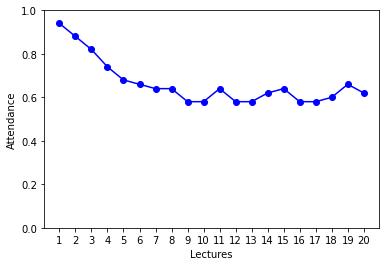

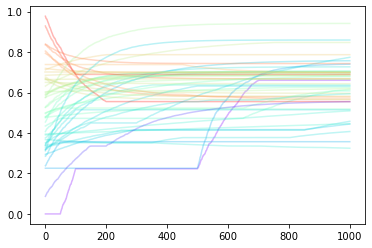

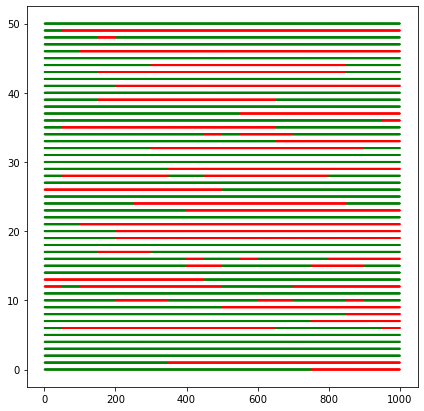

expressiveness_mu:  0.4


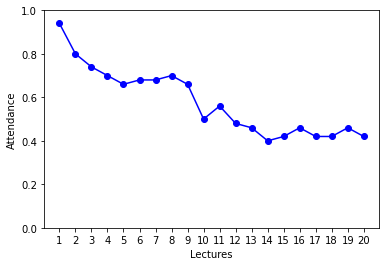

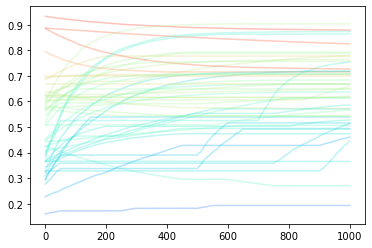

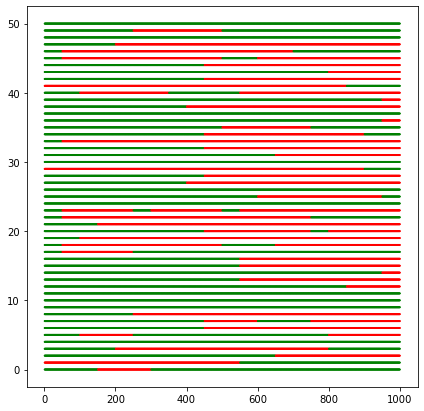

expressiveness_mu:  0.5


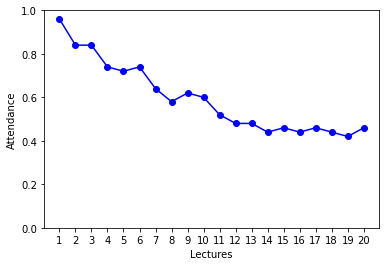

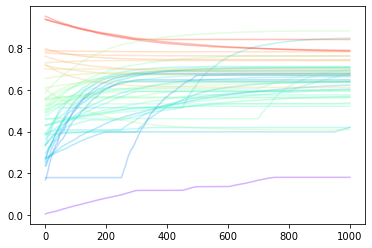

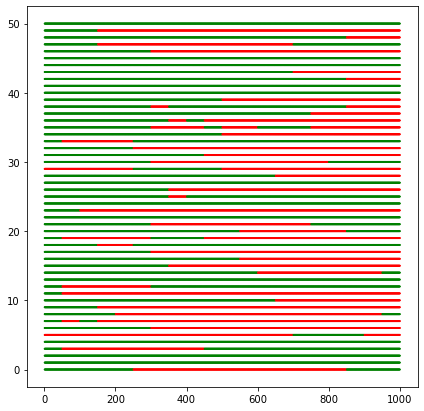

expressiveness_mu:  0.6


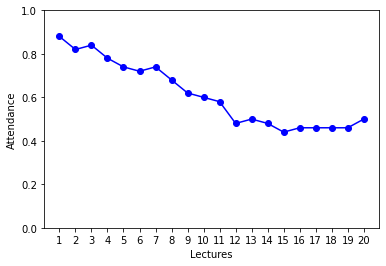

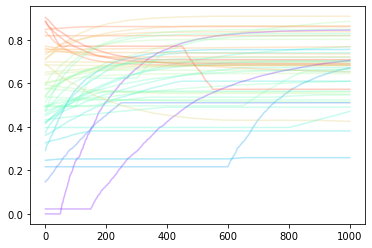

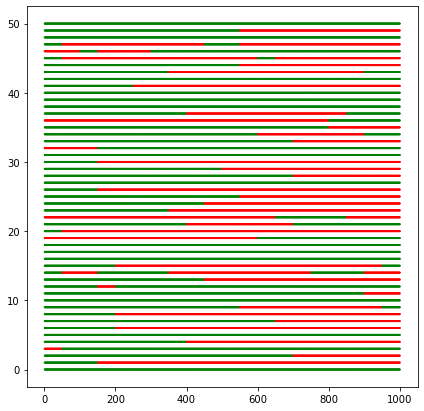

expressiveness_mu:  0.7


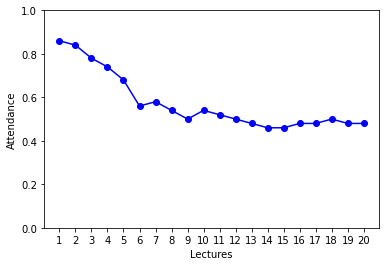

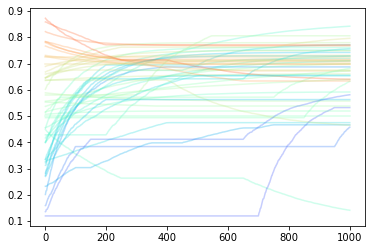

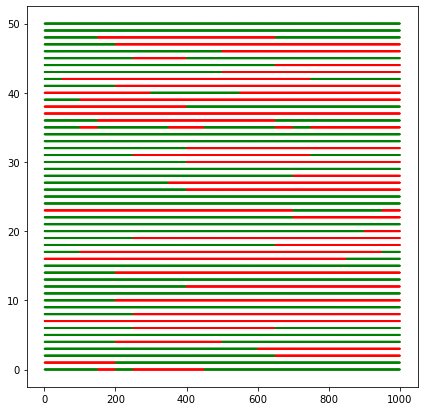

In [61]:
expressiveness_mu = [0.3,0.4,0.5,0.6,0.7]
for j, expressiveness_mu_index in enumerate(expressiveness_mu):
    expressiveness_mu = expressiveness_mu_index
    model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, expressiveness_mu=expressiveness_mu, expressiveness_sigma=expressiveness_sigma, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt)
    model.run_model()
    print("expressiveness_mu: ", expressiveness_mu_index)
    visualize(model, num_agents)

This is a result from 0.3


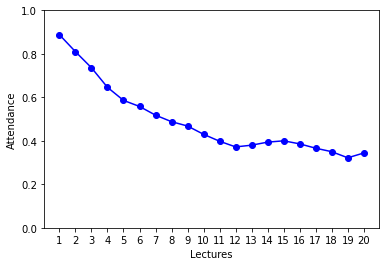

In [25]:
expressiveness_repeat = [0.3] * 10

lec_num = int(model.max_steps / model.lecture_duration)
lecture_steps = range(1, 1 + lec_num)
attendances_average_3 = [0] * lec_num

for j, expressiveness_index in enumerate(expressiveness_repeat):
    initial_emotion_teacher = expressiveness_index
    model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, expressiveness_mu=expressiveness_mu, expressiveness_sigma=expressiveness_sigma, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt)
    model.run_model()
    res = model.datacollector.get_model_vars_dataframe()['Attendance']
    attendances_tmp = [res[model.lecture_duration * i] for i in range(lec_num)]
    for tmp_index in range(len(attendances_tmp)):
        attendances_average_3[tmp_index] = attendances_average_3[tmp_index] + (attendances_tmp[tmp_index] / len(expressiveness_repeat))

print("This is a result from " + str(0.3))
plt.plot(lecture_steps, attendances_average_3, '-bo')
plt.ylim(0, 1)
plt.gca().axes.set_xticks(lecture_steps)
plt.xlabel("Lectures")
plt.ylabel("Attendance")
plt.show()

This is a result from 0.5


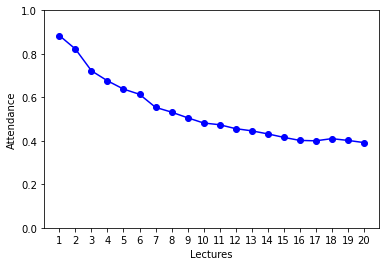

In [27]:
expressiveness_repeat = [0.5] * 10

lec_num = int(model.max_steps / model.lecture_duration)
lecture_steps = range(1, 1 + lec_num)
attendances_average_5 = [0] * lec_num

for j, expressiveness_index in enumerate(expressiveness_repeat):
    initial_emotion_teacher = expressiveness_index
    model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, expressiveness_mu=expressiveness_mu, expressiveness_sigma=expressiveness_sigma, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt)
    model.run_model()
    res = model.datacollector.get_model_vars_dataframe()['Attendance']
    attendances_tmp = [res[model.lecture_duration * i] for i in range(lec_num)]
    for tmp_index in range(len(attendances_tmp)):
        attendances_average_5[tmp_index] = attendances_average_5[tmp_index] + (attendances_tmp[tmp_index] / len(expressiveness_repeat))

print("This is a result from " + str(0.5))
plt.plot(lecture_steps, attendances_average_5, '-bo')
plt.ylim(0, 1)
plt.gca().axes.set_xticks(lecture_steps)
plt.xlabel("Lectures")
plt.ylabel("Attendance")
plt.show()

This is a result from 0.7


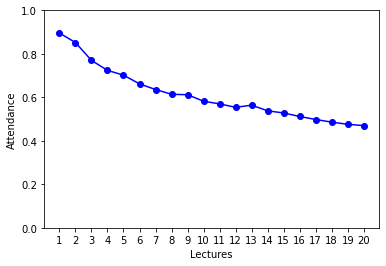

In [30]:
expressiveness_repeat = [0.7] * 10

lec_num = int(model.max_steps / model.lecture_duration)
lecture_steps = range(1, 1 + lec_num)
attendances_average_7 = [0] * lec_num

for j, expressiveness_index in enumerate(expressiveness_repeat):
    initial_emotion_teacher = expressiveness_index
    model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, expressiveness_mu=expressiveness_mu, expressiveness_sigma=expressiveness_sigma, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt)
    model.run_model()
    res = model.datacollector.get_model_vars_dataframe()['Attendance']
    attendances_tmp = [res[model.lecture_duration * i] for i in range(lec_num)]
    for tmp_index in range(len(attendances_tmp)):
        attendances_average_7[tmp_index] = attendances_average_7[tmp_index] + (attendances_tmp[tmp_index] / len(expressiveness_repeat))

print("This is a result from " + str(0.7))
plt.plot(lecture_steps, attendances_average_7, '-bo')
plt.ylim(0, 1)
plt.gca().axes.set_xticks(lecture_steps)
plt.xlabel("Lectures")
plt.ylabel("Attendance")
plt.show()

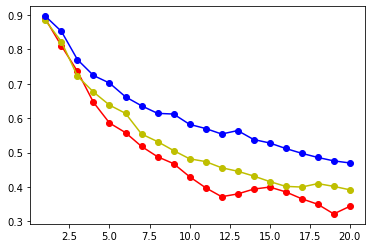

In [64]:
plt.plot(lecture_steps,attendances_average_3,'-ro',label='0.3')
plt.plot(lecture_steps,attendances_average_5,'-yo',label='0.5')
plt.plot(lecture_steps,attendances_average_7,'-bo',label='0.7')
